In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
cars = pd.read_csv("car.csv")
cars.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
cars.columns = ("Sales", "Maintenance", "Doors", "Persons", "Boot_space", "Safety", "Class")
cars.head()

,Sales,Maintenance,Doors,Persons,Boot_space,Safety,Class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
cars.describe()

,Sales,Maintenance,Doors,Persons,Boot_space,Safety,Class
count,1727,1727,1727,1727,1727,1727,1727
unique,4,4,4,3,3,3,4
top,high,high,3,4,med,med,unacc
freq,432,432,432,576,576,576,1209


In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Sales        1727 non-null   object
 1   Maintenance  1727 non-null   object
 2   Doors        1727 non-null   object
 3   Persons      1727 non-null   object
 4   Boot_space   1727 non-null   object
 5   Safety       1727 non-null   object
 6   Class        1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
LE = LabelEncoder()
cars["Sales"] = LE.fit_transform(cars["Sales"])
cars["Maintenance"] = LE.fit_transform(cars["Maintenance"])
cars["Doors"] = LE.fit_transform(cars["Doors"])
cars["Persons"] = LE.fit_transform(cars["Persons"])
cars["Boot_space"] = LE.fit_transform(cars["Boot_space"])
cars["Safety"] = LE.fit_transform(cars["Safety"])
cars["Class"] = LE.fit_transform(cars["Class"])

In [9]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Sales        1727 non-null   int32
 1   Maintenance  1727 non-null   int32
 2   Doors        1727 non-null   int32
 3   Persons      1727 non-null   int32
 4   Boot_space   1727 non-null   int32
 5   Safety       1727 non-null   int32
 6   Class        1727 non-null   int32
dtypes: int32(7)
memory usage: 47.4 KB


In [12]:
cars.head(5)

,Sales,Maintenance,Doors,Persons,Boot_space,Safety,Class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


In [16]:
X = cars[["Sales", "Maintenance", "Doors", "Persons", "Boot_space", "Safety"]]
Y = cars["Class"]

In [17]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [19]:
classifier = DecisionTreeClassifier(criterion = "entropy", random_state = 0)
classifier.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [20]:
y_pred = classifier.predict(x_test)

In [21]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        77
           1       0.92      0.80      0.86        15
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00        15

    accuracy                           0.99       346
   macro avg       0.97      0.94      0.96       346
weighted avg       0.99      0.99      0.99       346



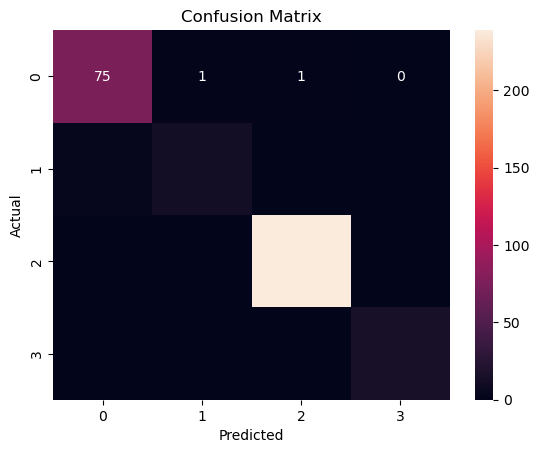

In [22]:
matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()